In [16]:
# display graph on notebook
%matplotlib inline
%load_ext autoreload
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression, SGDClassifier
from sklearn.cross_validation import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values
zip(x, y)

[(array([ 5.1,  1.4]), -1),
 (array([ 4.9,  1.4]), -1),
 (array([ 4.7,  1.3]), -1),
 (array([ 4.6,  1.5]), -1),
 (array([ 5. ,  1.4]), -1),
 (array([ 5.4,  1.7]), -1),
 (array([ 4.6,  1.4]), -1),
 (array([ 5. ,  1.5]), -1),
 (array([ 4.4,  1.4]), -1),
 (array([ 4.9,  1.5]), -1),
 (array([ 5.4,  1.5]), -1),
 (array([ 4.8,  1.6]), -1),
 (array([ 4.8,  1.4]), -1),
 (array([ 4.3,  1.1]), -1),
 (array([ 5.8,  1.2]), -1),
 (array([ 5.7,  1.5]), -1),
 (array([ 5.4,  1.3]), -1),
 (array([ 5.1,  1.4]), -1),
 (array([ 5.7,  1.7]), -1),
 (array([ 5.1,  1.5]), -1),
 (array([ 5.4,  1.7]), -1),
 (array([ 5.1,  1.5]), -1),
 (array([ 4.6,  1. ]), -1),
 (array([ 5.1,  1.7]), -1),
 (array([ 4.8,  1.9]), -1),
 (array([ 5. ,  1.6]), -1),
 (array([ 5. ,  1.6]), -1),
 (array([ 5.2,  1.5]), -1),
 (array([ 5.2,  1.4]), -1),
 (array([ 4.7,  1.6]), -1),
 (array([ 4.8,  1.6]), -1),
 (array([ 5.4,  1.5]), -1),
 (array([ 5.2,  1.5]), -1),
 (array([ 5.5,  1.4]), -1),
 (array([ 4.9,  1.5]), -1),
 (array([ 5. ,  1.2]

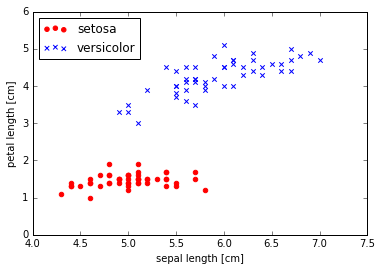

In [4]:
plt.scatter(x[:50,0], x[:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
print((y_test != y_pred).sum())

1


In [7]:
%who

ListedColormap	 LogisticRegression	 Perceptron	 SGDClassifier	 df	 np	 pd	 plt	 ppn	 
train_test_split	 x	 x_test	 x_train	 y	 y_pred	 y_test	 y_train	 


In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

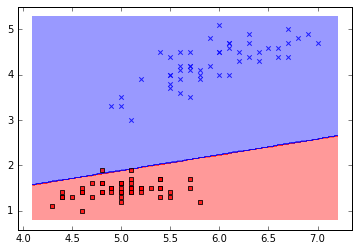

In [19]:
import jupyter_util
jupyter_util.remove_module('machine_learning_util')
import machine_learning_util
machine_learning_util.plot_decision_regions(x, y, ppn)

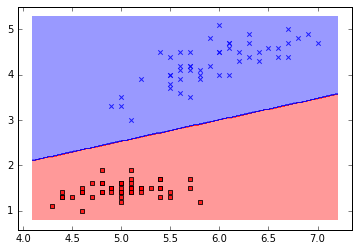

In [20]:
machine_learning_util.plot_decision_regions(x, y, lr)

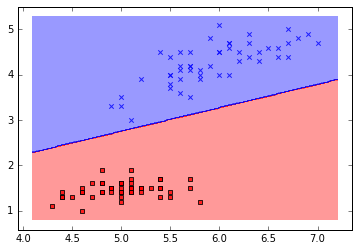

In [22]:
machine_learning_util.plot_decision_regions(x, y, sgd)